# Chapter 4: Training Models

In [1]:
import numpy as np

X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

In [11]:
# y = 4 + 3x1 + Gaussian noise

In [2]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'y')

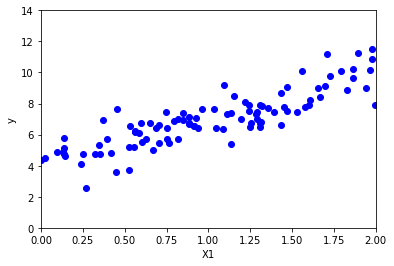

In [522]:
plt.plot(X, y, 'bo')
plt.axis([0,2, 0,14])
plt.xlabel('X1')
plt.ylabel('y')

In [523]:
X_b = np.c_[np.ones((100, 1)), X]  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y) #inv((T_bias_X * bias_X) * T_bias_X * y)

In [524]:
X_b.T.dot(X_b)

array([[100.        , 100.29529324],
       [100.29529324, 129.39939409]])

In [525]:
np.linalg.inv(X_b.T.dot(X_b))

array([[ 0.04491797, -0.03481516],
       [-0.03481516,  0.03471266]])

In [526]:
X_b.T.shape
#2x100 * 100x2 = 2x2

(2, 100)

In [527]:
X_b.T.dot(X_b)

array([[100.        , 100.29529324],
       [100.29529324, 129.39939409]])

In [528]:
theta_best

array([[4.13996182],
       [2.83032606]])

In [529]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[4.13996182],
       [9.80061393]])

In [530]:
y_predict

array([[4.13996182],
       [9.80061393]])

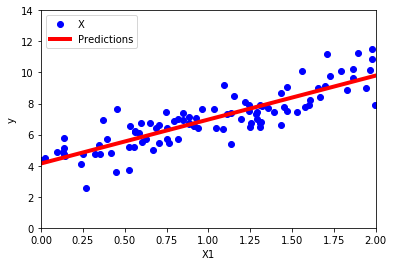

In [531]:
plt.plot(X, y, 'bo')
plt.plot(X_new, y_predict, 'r-', linewidth=4)
plt.legend(['X', 'Predictions'], loc='upper left')
plt.axis([0,2, 0,14])
plt.xlabel('X1')
plt.ylabel('y')
plt.show()

In [532]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.13996182]), array([[2.83032606]]))

In [533]:
lin_reg.predict(X_new)

array([[4.13996182],
       [9.80061393]])

In [534]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.13996182],
       [2.83032606]])

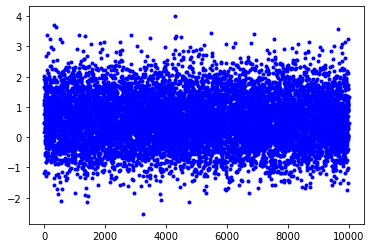

In [535]:
plt.plot([np.random.randn(2,1).max() for _ in range(10000)], 'b.')

In [536]:
eta = 0.1  # learning rate
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)  # random initialization
theta_step = []

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients
    y_predict = X_new_b.dot(theta)
    theta_step.append(y_predict)

In [537]:
theta

array([[4.13996182],
       [2.83032606]])

In [538]:
len(theta_step)

1000

In [539]:
X_new_b

array([[1., 0.],
       [1., 2.]])

In [553]:
theta_step = []
theta = 0

for i in range(100):
    y_predict = X_new_b.dot(theta)
    gradients = 2/len(X_b) * X_b.T.dot(X_b.dot(theta) - y)
    theta_step.append(y_predict)
    theta = theta - 0.1 * gradients

In [554]:
len(y)

100

In [555]:
len(theta_step)

100

In [556]:
X_new_b.dot(theta)

array([[4.07495638, 4.07495638],
       [9.8479534 , 9.8479534 ]])

In [625]:
theta_step[:20]

[array([[3.4039167]]),
 array([[2.9621671]]),
 array([[3.51328946]]),
 array([[3.43475833]]),
 array([[3.84884411]]),
 array([[4.97088001]]),
 array([[8.00227941]]),
 array([[7.24550892]]),
 array([[8.42301457]]),
 array([[7.61627893]]),
 array([[5.8523557]]),
 array([[7.25353639]]),
 array([[6.71707167]]),
 array([[10.56284773]]),
 array([[7.99232109]]),
 array([[6.67110912]]),
 array([[9.85694387]]),
 array([[6.18841764]]),
 array([[10.38036599]]),
 array([[8.0357506]])]

Text(0.5, 1.0, 'eta = 0.1')

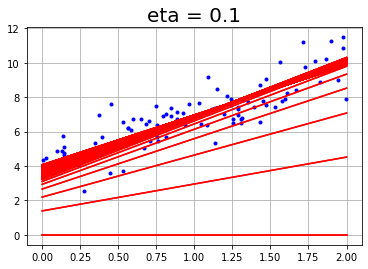

In [558]:
plt.plot(X,y, 'b.')
for i in theta_step:
    plt.plot(X_new, i, 'r-')
plt.grid(True)
plt.title('eta = 0.1', fontsize=20)

In [559]:
m

100

In [591]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)

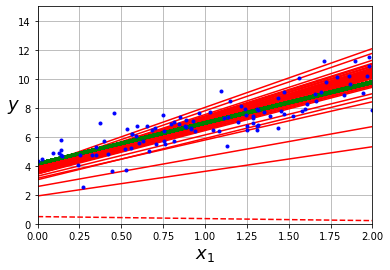

In [592]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2,1)  # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch == 0 and i < 50:                    
            y_predict = X_new_b.dot(theta)           
            style = "r-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style)
        elif epoch == n_epochs-1:
            y_predict = X_new_b.dot(theta)           
            style = "g-" if i > 0 else "r--"         
            plt.plot(X_new, y_predict, style, linewidth=3)
            
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                     
plt.ylabel("$y$", rotation=0, fontsize=18)   
plt.grid(True)
plt.axis([0, 2, 0, 15])                              
plt.show()                                           

In [593]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(X, y.ravel())

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.1, fit_intercept=True, l1_ratio=0.15,
             learning_rate='invscaling', loss='squared_loss', max_iter=1000,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=0.001, validation_fraction=0.1, verbose=0,
             warm_start=False)

In [594]:
sgd_reg.intercept_, sgd_reg.coef_

(array([4.17844427]), array([2.90663571]))

In [595]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

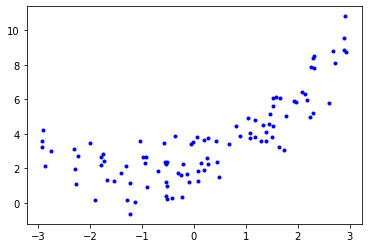

In [596]:
plt.plot(X, y, 'b.')

In [599]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([1.97322766])

In [600]:
X_poly[0]

array([1.97322766, 3.89362739])

In [601]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_
#intercept        , 1st order, 2nd order
#.47 * x^2 + 1.01 * x + 2.20

(array([2.19573036]), array([[1.00978737, 0.4681429 ]]))

In [603]:
y_pred = lin_reg.predict(X_poly)

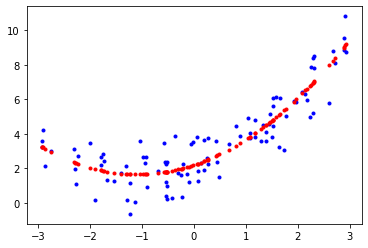

In [606]:
plt.plot(X, y, 'b.')
plt.plot(X, y_pred, 'r.')

In [623]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_pred_new = lin_reg.predict(X_new_poly)
X_new_poly[:20], X_new[:20]

(array([[-3.        ,  9.        ],
        [-2.93939394,  8.64003673],
        [-2.87878788,  8.28741965],
        [-2.81818182,  7.94214876],
        [-2.75757576,  7.60422406],
        [-2.6969697 ,  7.27364555],
        [-2.63636364,  6.95041322],
        [-2.57575758,  6.63452709],
        [-2.51515152,  6.32598714],
        [-2.45454545,  6.02479339],
        [-2.39393939,  5.73094582],
        [-2.33333333,  5.44444444],
        [-2.27272727,  5.16528926],
        [-2.21212121,  4.89348026],
        [-2.15151515,  4.62901745],
        [-2.09090909,  4.37190083],
        [-2.03030303,  4.12213039],
        [-1.96969697,  3.87970615],
        [-1.90909091,  3.6446281 ],
        [-1.84848485,  3.41689624]]),
 array([[-3.        ],
        [-2.93939394],
        [-2.87878788],
        [-2.81818182],
        [-2.75757576],
        [-2.6969697 ],
        [-2.63636364],
        [-2.57575758],
        [-2.51515152],
        [-2.45454545],
        [-2.39393939],
        [-2.33333333],
  

[-3, 3, -2, 14]

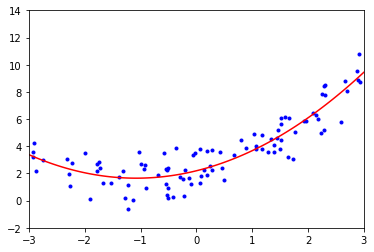

In [624]:
plt.plot(X, y, 'b.')
plt.plot(X_new, y_pred_new, 'r-')
plt.axis([-3,3,-2,14])

In [673]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(['Train', 'Val'])

Text(0, 0.5, 'Training set size')

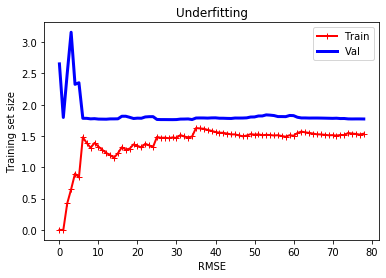

In [677]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.title('Underfitting')
plt.xlabel('RMSE')
plt.ylabel('Training set size')

Text(0.5, 1.0, 'Overfitting')

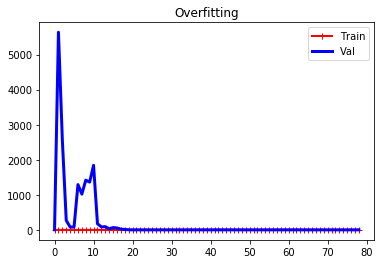

In [686]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.title('Overfitting')

Text(0.5, 1.0, 'degree=4')

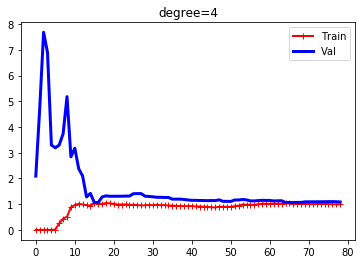

In [701]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=4, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.title('degree=4')

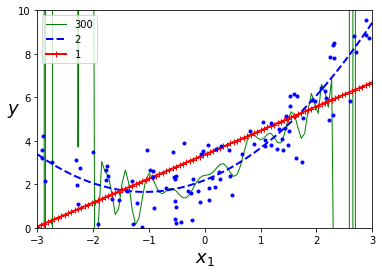

In [703]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

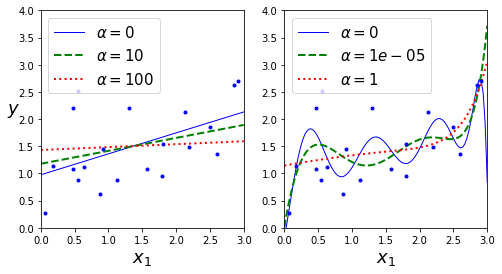

In [708]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        model.fit(X, y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)

plt.show()

In [725]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

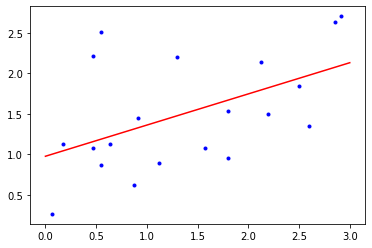

In [730]:
plt.plot(X,y, 'b.')
polynomial_regression.fit(X, y)
plt.plot(X_new, polynomial_regression.predict(X_new), 'r-')

In [767]:
%%time
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]]), ridge_reg.predict([[3]])

Wall time: 983 µs


(array([[1.55071465]]), array([[2.09492018]]))

In [763]:
%%time
sgd_reg = SGDRegressor(penalty='l2') #l2 => same equation as ridge regression
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]]), sgd_reg.predict([[3]])

Wall time: 997 µs


(array([1.46567176]), array([2.39188709]))

In [762]:
%%time
sgd_reg = SGDRegressor(penalty='l1') #l1 => same equation as lasso regression
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]]), sgd_reg.predict([[3]])

Wall time: 983 µs


(array([1.46502431]), array([2.39189736]))

In [749]:
y

array([[0.88658943],
       [2.63556968],
       [1.49264153],
       [0.95645193],
       [2.21112714],
       [1.08347425],
       [1.13214422],
       [1.34943209],
       [1.5387507 ],
       [2.13605726],
       [0.26354769],
       [2.70533012],
       [1.84823817],
       [1.12404617],
       [0.87159971],
       [2.50995889],
       [1.44736521],
       [1.08199403],
       [2.1962808 ],
       [0.62294794]])

In [748]:
y.T

array([[0.88658943, 2.63556968, 1.49264153, 0.95645193, 2.21112714,
        1.08347425, 1.13214422, 1.34943209, 1.5387507 , 2.13605726,
        0.26354769, 2.70533012, 1.84823817, 1.12404617, 0.87159971,
        2.50995889, 1.44736521, 1.08199403, 2.1962808 , 0.62294794]])

In [743]:
y.ravel() #equivalent to reshape(-1)

array([0.88658943, 2.63556968, 1.49264153, 0.95645193, 2.21112714,
       1.08347425, 1.13214422, 1.34943209, 1.5387507 , 2.13605726,
       0.26354769, 2.70533012, 1.84823817, 1.12404617, 0.87159971,
       2.50995889, 1.44736521, 1.08199403, 2.1962808 , 0.62294794])

In [751]:
y.T.ravel()

array([0.88658943, 2.63556968, 1.49264153, 0.95645193, 2.21112714,
       1.08347425, 1.13214422, 1.34943209, 1.5387507 , 2.13605726,
       0.26354769, 2.70533012, 1.84823817, 1.12404617, 0.87159971,
       2.50995889, 1.44736521, 1.08199403, 2.1962808 , 0.62294794])

In [710]:
ridge_reg = Ridge(alpha=1, solver="sag", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]]), ridge_reg.predict([[3]])

(array([[1.5507201]]), array([[2.09499015]]))

In [770]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]]), elastic_net.predict([[3]])

(array([1.54333232]), array([2.00027161]))

In [784]:
X_train, X_val, y_train, y_val = train_test_split(X, y.ravel())

In [792]:
y.ravel()

array([0.88658943, 2.63556968, 1.49264153, 0.95645193, 2.21112714,
       1.08347425, 1.13214422, 1.34943209, 1.5387507 , 2.13605726,
       0.26354769, 2.70533012, 1.84823817, 1.12404617, 0.87159971,
       2.50995889, 1.44736521, 1.08199403, 2.1962808 , 0.62294794])

In [785]:
from sklearn.base import clone

# prepare the data
poly_scaler = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate="constant", eta0=0.0005)

minimum_val_error = float("inf")
best_epoch = None
best_model = None
for epoch in range(1000):
    sgd_reg.fit(X_train_poly_scaled, y_train)  # continues where it left off
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = clone(sgd_reg)

In [786]:
best_epoch, best_model

(78,
 SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
              eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
              learning_rate='constant', loss='squared_loss', max_iter=1,
              n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
              shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
              warm_start=True))

In [797]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [798]:
X = iris['data'][:,3:]
y = (iris['target'] == 2).astype(np.int)

In [799]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [814]:
X_new[y_proba[:, 1] >= 0.5][0]

array([1.66066066])

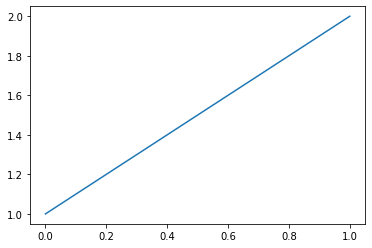

In [830]:
plt.plot([0, 1], [1, 2])

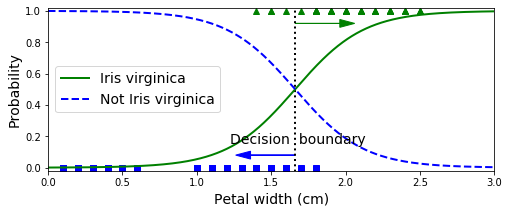

In [831]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])

plt.show()

In [832]:
log_reg.predict([[1.7], [1.5]]) #proximity of decision boundary

array([1, 0])

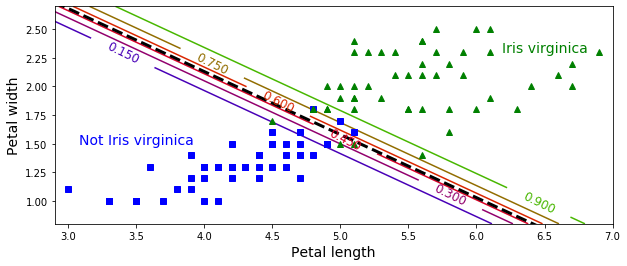

In [833]:
from sklearn.linear_model import LogisticRegression

X = iris["data"][:, (2, 3)]  # petal length, petal width
y = (iris["target"] == 2).astype(np.int)

log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]

y_proba = log_reg.predict_proba(X_new)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs")
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.clabel(contour, inline=1, fontsize=12)
plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

plt.show()

In [834]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [835]:
softmax_reg.predict([[5,2]])

array([2])

In [836]:
softmax_reg.predict_proba([[5,2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

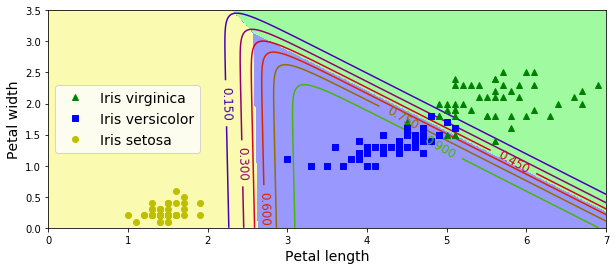

In [837]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()